In [3]:
import pandas as pd

file_path = '/Users/aakashmehta/Downloads/lyrics.csv'

# Loading the dataset
df_lyrics = pd.read_csv(file_path)

# Print the first few rows of the DataFrame
print(df_lyrics.head())


   Unnamed: 0                                              Lyric  genre
0           0  Etsin nutta pelkoa, syvyytta Mutta en ainoasta...  Metal
1           1  Drops of new gleaming In the flesh new morning...  Metal
2           2  Electro eroticism Intelligence is sexy Electro...  Metal
3           3  Inhaleexhale Inhale the exhaled Inhaleexhale I...  Metal
4           4  Under the dark sky we stand Under heavy rain w...  Metal


Missing data, duplicates, and inconsistencies

In [2]:
import pandas as pd

# Check for missing values
print("Missing values before handling:")
print(df_lyrics.isnull().sum())

# Option 2: Drop rows with any missing values
df_lyrics.dropna(inplace=True)

# Checking for duplicates
print("Number of duplicate rows before drop:", df_lyrics.duplicated().sum())

# Removing duplicate rows
df_lyrics.drop_duplicates(inplace=True)

# Check for inconsistencies in categorical data, e.g., the 'genre' column
print("Genre value counts before handling:")
print(df_lyrics['genre'].value_counts())

# After handling, you can check the changes
print("\nMissing values, duplicates, and genre inconsistencies after handling:")
print(df_lyrics.isnull().sum())
print("Number of duplicate rows after drop:", df_lyrics.duplicated().sum())
print(df_lyrics['genre'].value_counts())

# Printing the cleaned DataFrame's first few rows
print(df_lyrics.head())


Missing values before handling:
Unnamed: 0    0
Lyric         0
genre         0
dtype: int64
Number of duplicate rows before drop: 0
Genre value counts before handling:
genre
rap        200000
Metal      179655
pop        107042
rock       104034
country     92103
Name: count, dtype: int64

Missing values, duplicates, and genre inconsistencies after handling:
Unnamed: 0    0
Lyric         0
genre         0
dtype: int64
Number of duplicate rows after drop: 0
genre
rap        200000
Metal      179655
pop        107042
rock       104034
country     92103
Name: count, dtype: int64
   Unnamed: 0                                              Lyric  genre
0           0  Etsin nutta pelkoa, syvyytta Mutta en ainoasta...  Metal
1           1  Drops of new gleaming In the flesh new morning...  Metal
2           2  Electro eroticism Intelligence is sexy Electro...  Metal
3           3  Inhaleexhale Inhale the exhaled Inhaleexhale I...  Metal
4           4  Under the dark sky we stand Under heavy r

Handling Outliers

Lyric Length: Identify songs with unusually short or long lyrics which might be instrumental tracks or errors.

In [3]:
# Calculating the length of each lyric
df_lyrics['lyric_length'] = df_lyrics['Lyric'].str.len()

# Getting statistics on the lyric lengths to identify outliers
print(df_lyrics['lyric_length'].describe())

# Option to remove outliers based on a chosen threshold (e.g., below 10th or above 90th percentile)
lower_threshold, upper_threshold = df_lyrics['lyric_length'].quantile([0.10, 0.90])
df_lyrics = df_lyrics[(df_lyrics['lyric_length'] >= lower_threshold) & (df_lyrics['lyric_length'] <= upper_threshold)]


count    682834.000000
mean       1436.214067
std        1143.609579
min           6.000000
25%         736.000000
50%        1127.000000
75%        1838.000000
max       92082.000000
Name: lyric_length, dtype: float64


In [4]:
# from textblob import TextBlob

# # This is an example and would be quite slow for a large dataset.
# df_lyrics['Lyric_corrected'] = df_lyrics['Lyric'].apply(lambda x: str(TextBlob(x).correct()))


Exploratory Data Analysis (EDA)

Bar Chart for Genre Distribution

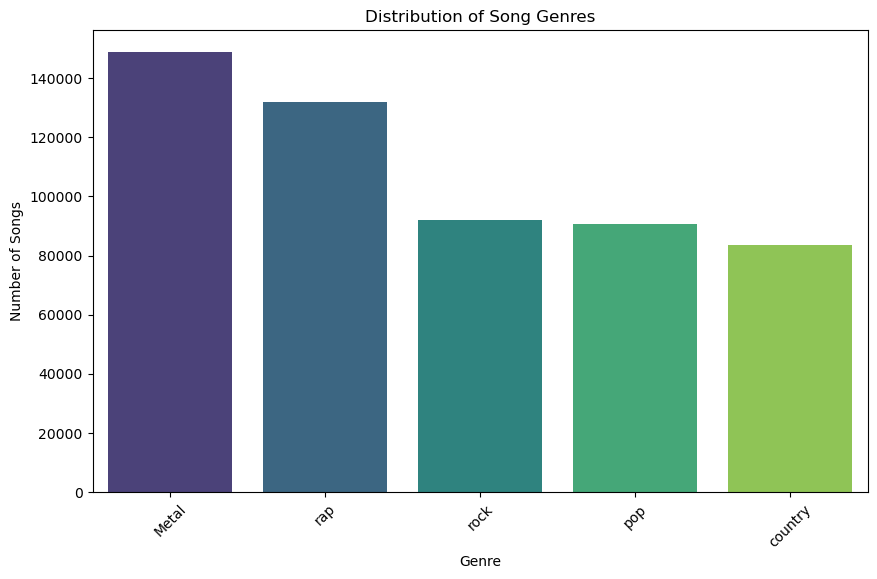

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of genres as a bar chart
plt.figure(figsize=(10, 6))
genre_count = df_lyrics['genre'].value_counts()
sns.barplot(x=genre_count.index, y=genre_count.values, palette='viridis')
plt.title('Distribution of Song Genres')
plt.ylabel('Number of Songs')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.show()


Generating Word Clouds for Each Genre

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aakashmehta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


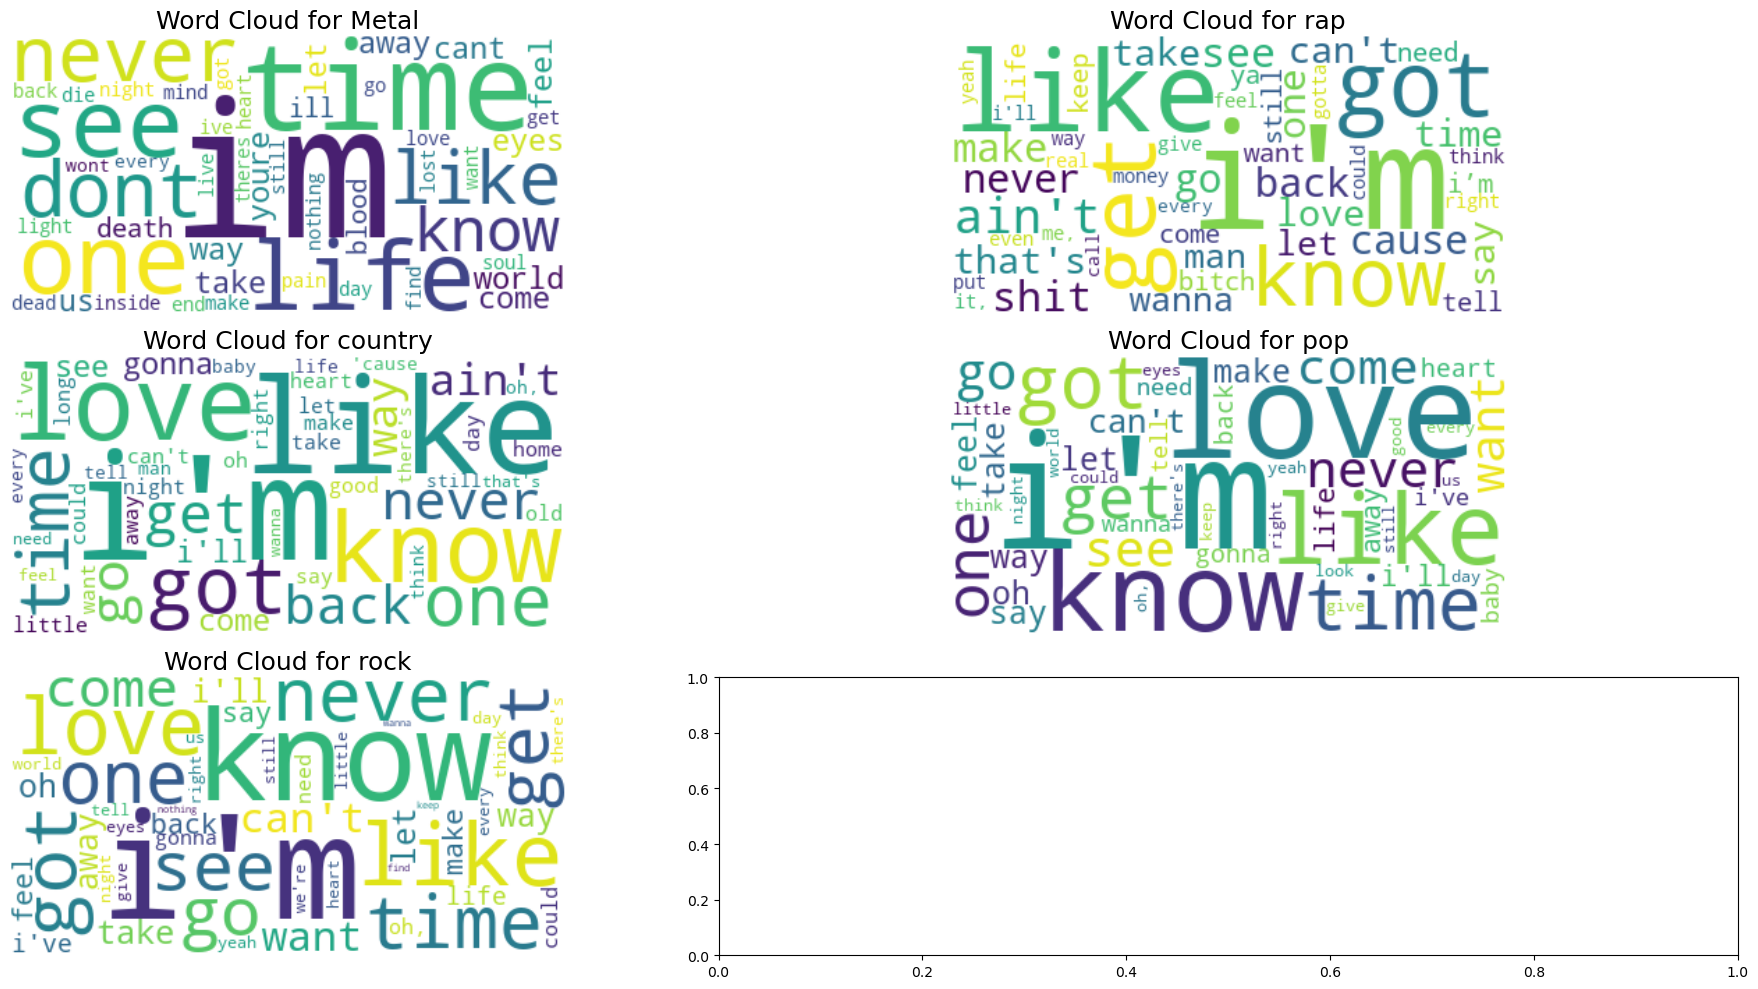

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
import re  # Regular expressions

nltk.download('stopwords')

# Set stopwords (common words that may not be meaningful)
stop_words = set(stopwords.words('english'))
# Add specific unwanted words to the stop words set
additional_stopwords = {'niggas', 'nigga', 'fuck', 'verse', 'chorus'}
stop_words.update(additional_stopwords)

# Assuming df_lyrics is your DataFrame with 'Lyric' and 'genre' columns
genres = df_lyrics['genre'].unique()

# Create a subplot for each genre
fig, axes = plt.subplots(nrows=len(genres)//2 + len(genres)%2, ncols=2, figsize=(20, 10))
axes = axes.flatten()  # Flatten the axes array for easy looping

for i, genre in enumerate(genres):
    # Filter the DataFrame by genre and concatenate all lyrics into a single string
    lyrics_text = ' '.join(df_lyrics[df_lyrics['genre'] == genre]['Lyric'].tolist())
    
    # Remove bracketed text using regular expression
    lyrics_text = re.sub(r'\[.*?\]', '', lyrics_text)
    
    # Tokenize and remove stop words and specific unwanted words
    words = [word for word in lyrics_text.lower().split() if word not in stop_words and len(word) > 1]
    
    # Generate word frequency using Counter
    word_freq = Counter(words)
    
    # Generate word cloud
    wordcloud = WordCloud(width=400, height=200, max_words=50, background_color='white').generate_from_frequencies(word_freq)
    
    # Plot
    ax = axes[i]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Word Cloud for {genre}', fontsize=18)

# Adjust layout
plt.tight_layout()
plt.show()


Average Number of Words Per Song by Genre

genre
rap        374.712527
country    231.328071
rock       223.221925
pop        220.972878
Metal      182.400864
Name: word_count, dtype: float64


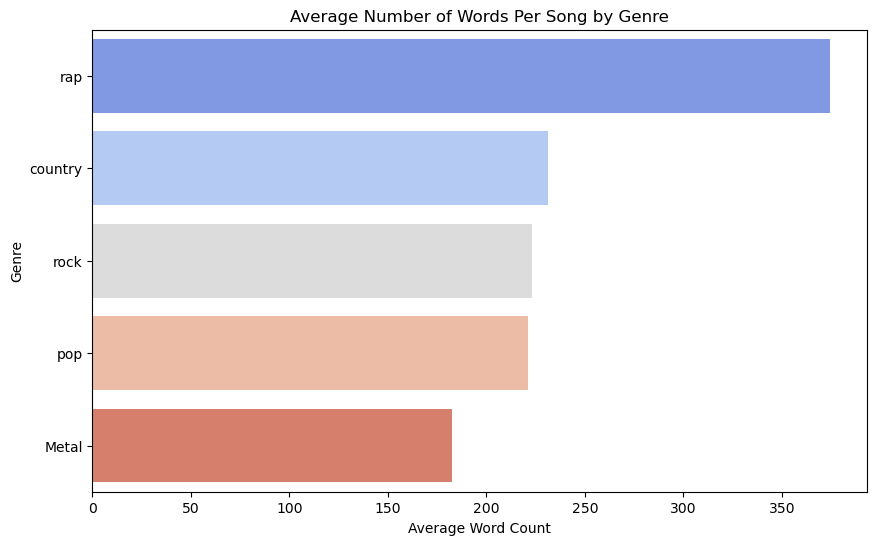

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_lyrics is your DataFrame and it has been preprocessed for analysis
df_lyrics['word_count'] = df_lyrics['Lyric'].apply(lambda x: len(x.split()))

# Calculate the average word count per song by genre
avg_word_count_by_genre = df_lyrics.groupby('genre')['word_count'].mean().sort_values(ascending=False)

# Displaying the results
print(avg_word_count_by_genre)

# Plotting the average word count per genre
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_word_count_by_genre.values, y=avg_word_count_by_genre.index, palette='coolwarm')
plt.title('Average Number of Words Per Song by Genre')
plt.xlabel('Average Word Count')
plt.ylabel('Genre')
plt.show()


Total word count of each genre

genre
rap        49365003
Metal      27119178
rock       20545346
pop        20002023
country    19311036
Name: word_count, dtype: int64


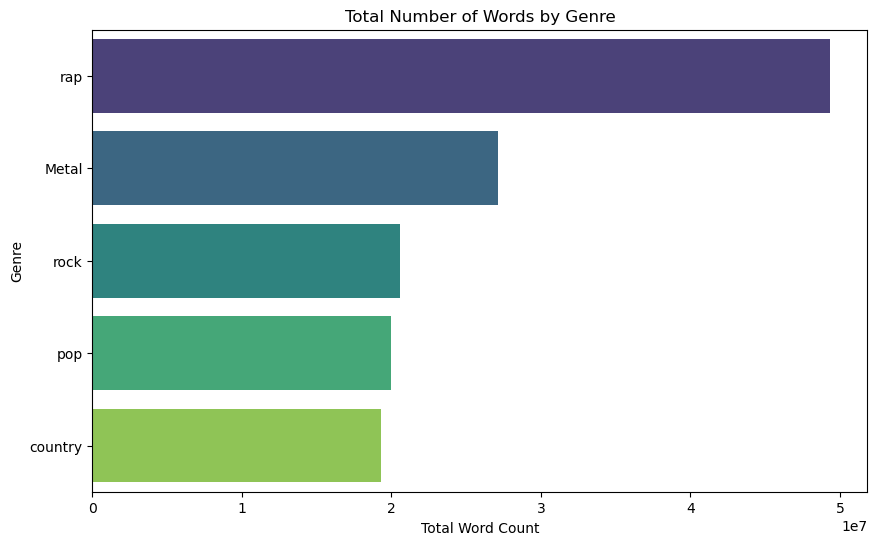

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_lyrics['word_count'] = df_lyrics['Lyric'].apply(lambda x: len(x.split()))

# Calculating the total word count per genre
total_word_count_by_genre = df_lyrics.groupby('genre')['word_count'].sum().sort_values(ascending=False)

# Displaying the results
print(total_word_count_by_genre)
# Plot the total word count per genre
plt.figure(figsize=(10, 6))
sns.barplot(x=total_word_count_by_genre.values, y=total_word_count_by_genre.index, palette='viridis')
plt.title('Total Number of Words by Genre')
plt.xlabel('Total Word Count')
plt.ylabel('Genre')
plt.show()


Genre-wise Distribution of Song Lengths (Boxplot)

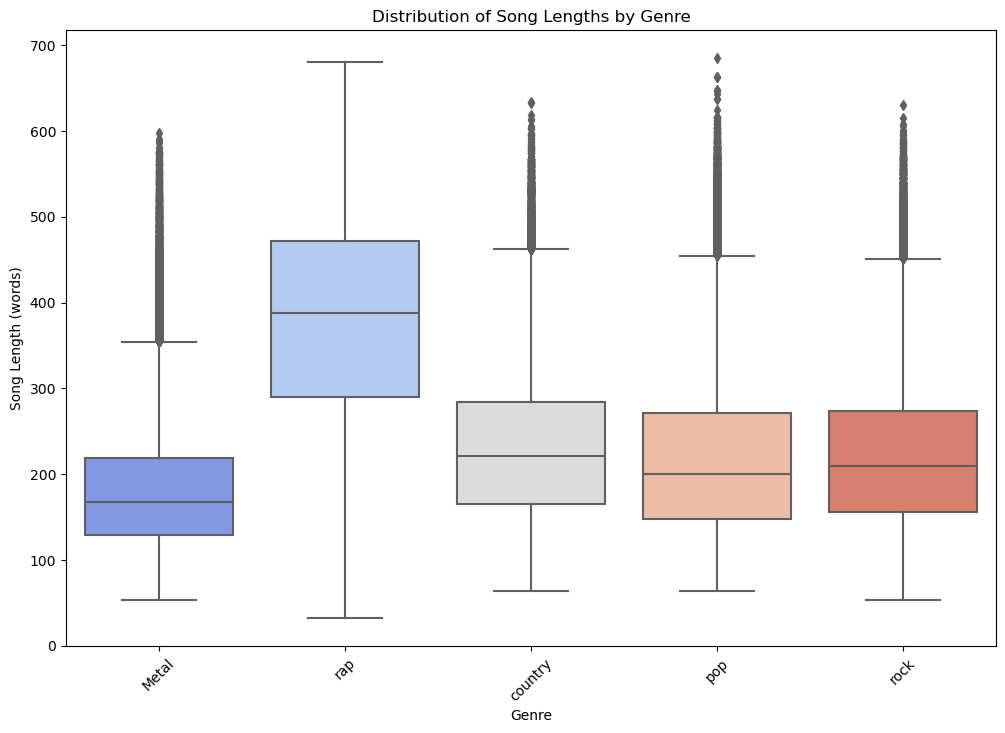

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

df_lyrics['song_length'] = df_lyrics['Lyric'].apply(lambda x: len(x.split()))

# Create a boxplot to see the distribution of song lengths by genre
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_lyrics, x='genre', y='song_length', palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Distribution of Song Lengths by Genre')
plt.xlabel('Genre')
plt.ylabel('Song Length (words)')
plt.show()


 Heatmap of Word Frequency by Genre

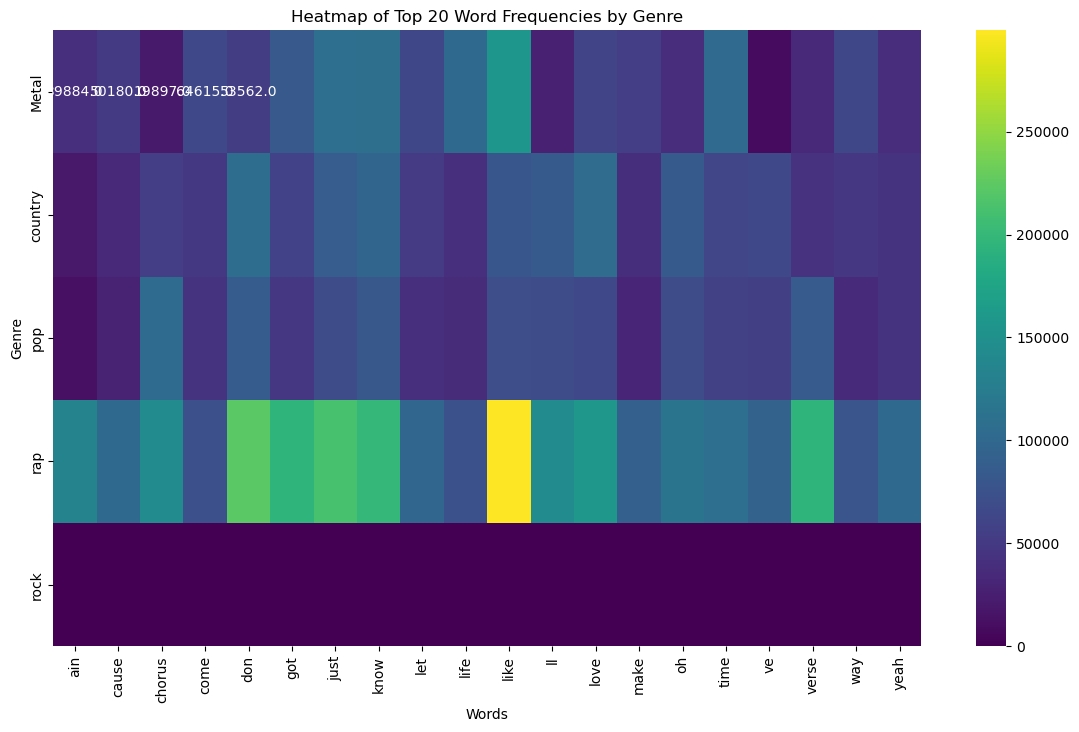

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Assuming you've preprocessed the lyrics
vectorizer = CountVectorizer(stop_words='english', max_features=20)  # considering top 20 words only for simplicity
X = vectorizer.fit_transform(df_lyrics['Lyric'])
features = vectorizer.get_feature_names_out()

# Sum word occurrences by genre
df_lyrics['word_count_vec'] = list(X.toarray())
df_words = pd.DataFrame(df_lyrics['word_count_vec'].tolist(), columns=features)
df_words = pd.concat([df_lyrics['genre'], df_words], axis=1)
df_words_grouped = df_words.groupby('genre').sum()

# Create a heatmap using float format
plt.figure(figsize=(14, 8))
sns.heatmap(df_words_grouped, annot=True, fmt=".1f", cmap='viridis')  # Changed 'd' to '.1f'
plt.title('Heatmap of Top 20 Word Frequencies by Genre')
plt.xlabel('Words')
plt.ylabel('Genre')
plt.show()



Lyrical Diversity Index (Unique Words vs. Total Words)

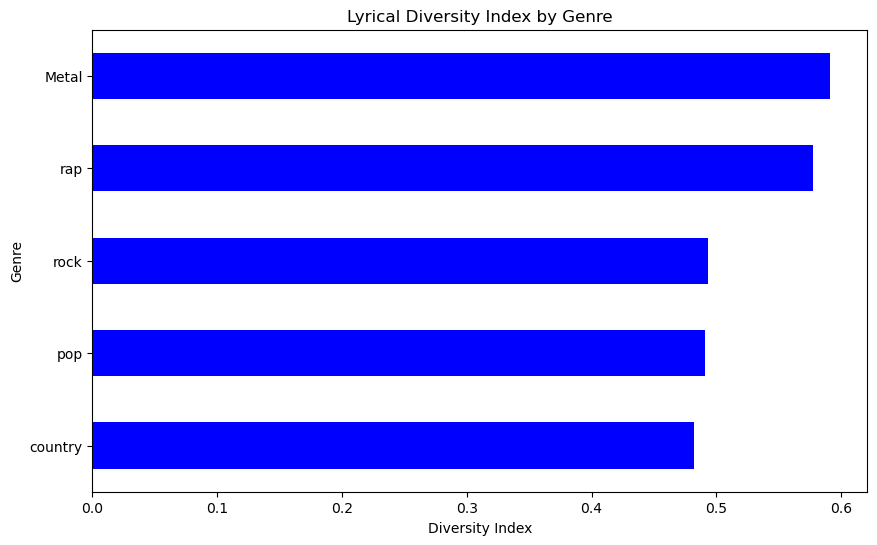

In [11]:
import matplotlib.pyplot as plt

# Calculate the number of unique words and total words per song
df_lyrics['unique_words'] = df_lyrics['Lyric'].apply(lambda x: len(set(x.split())))
df_lyrics['total_words'] = df_lyrics['Lyric'].apply(lambda x: len(x.split()))

# Calculate the lyrical diversity index (unique words / total words)
df_lyrics['diversity_index'] = df_lyrics['unique_words'] / df_lyrics['total_words']

# Group by genre and calculate average diversity index
diversity_by_genre = df_lyrics.groupby('genre')['diversity_index'].mean()

# Plot
plt.figure(figsize=(10, 6))
diversity_by_genre.sort_values().plot(kind='barh', color='blue')
plt.title('Lyrical Diversity Index by Genre')
plt.xlabel('Diversity Index')
plt.ylabel('Genre')
plt.show()


Genre Similarity Matrix

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity
# import seaborn as sns

# # Prepare TF-IDF vectorization of the lyrics
# tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
# X_tfidf = tfidf.fit_transform(df_lyrics['Lyric'])

# # Compute cosine similarity between genres
# df_lyrics['tfidf_vec'] = list(X_tfidf.toarray())
# df_tfidf = pd.DataFrame(df_lyrics['tfidf_vec'].tolist(), columns=tfidf.get_feature_names_out())
# df_tfidf = pd.concat([df_lyrics['genre'], df_tfidf], axis=1)
# similarity_matrix = cosine_similarity(df_tfidf.groupby('genre').mean())

# # Plot the similarity matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(similarity_matrix, annot=True, fmt=".2f", xticklabels=df_tfidf.groupby('genre').mean().index, yticklabels=df_tfidf.groupby('genre').mean().index, cmap='coolwarm')
# plt.title('Cosine Similarity Matrix Across Genres')
# plt.xlabel('Genre')
# plt.ylabel('Genre')
# plt.show()


Sentiment Distribution Across Genres

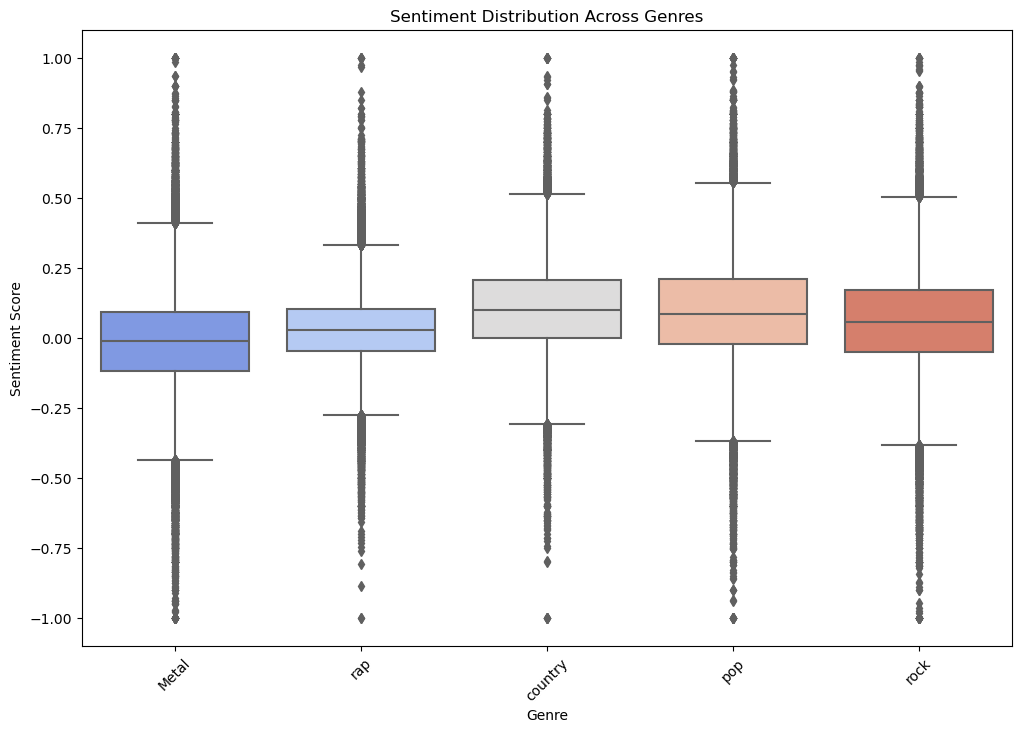

In [14]:
from textblob import TextBlob

# Calculate sentiment for each song
df_lyrics['sentiment'] = df_lyrics['Lyric'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot sentiment distribution by genre
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_lyrics, x='genre', y='sentiment', palette='coolwarm')
plt.title('Sentiment Distribution Across Genres')
plt.xlabel('Genre')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.show()


Thematic Presence Using TF-IDF

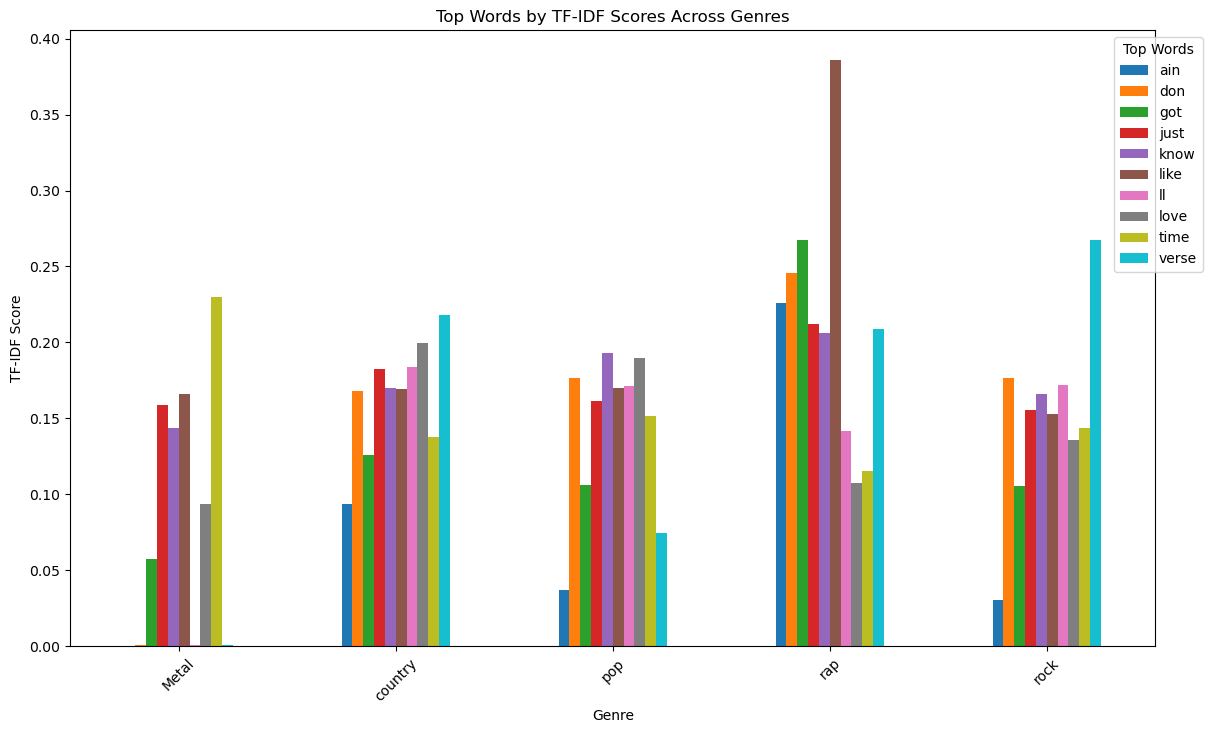

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Calculate TF-IDF scores
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_lyrics['Lyric'])
feature_names = tfidf_vectorizer.get_feature_names_out()

# Sum TF-IDF scores by genre
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
df_tfidf = pd.concat([df_lyrics['genre'], df_tfidf], axis=1)
top_words_tfidf = df_tfidf.groupby('genre').mean()

# Plot top words by TF-IDF scores for each genre
top_words_tfidf.plot(kind='bar', figsize=(14, 8))
plt.title('Top Words by TF-IDF Scores Across Genres')
plt.xlabel('Genre')
plt.ylabel('TF-IDF Score')
plt.legend(title='Top Words', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.show()


Most Frequent Word for Each Genre

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aakashmehta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


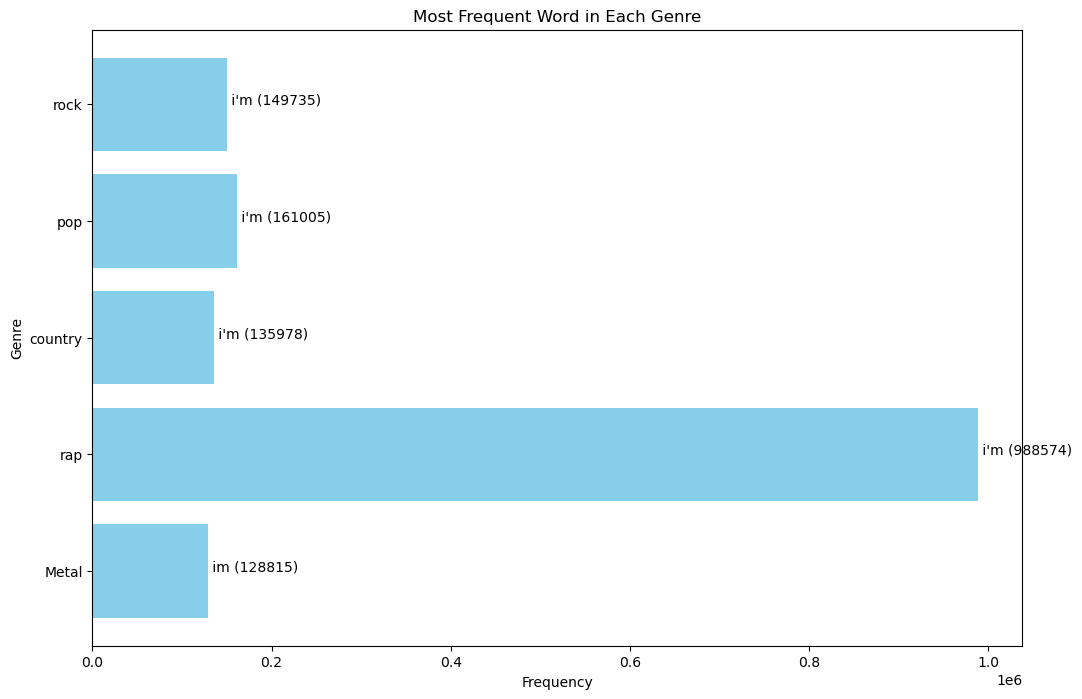

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
import re

nltk.download('stopwords')

# Set stopwords and include custom ones
stop_words = set(stopwords.words('english')) | {'niggas', 'nigga', 'fuck', 'verse', 'chorus'}

# Assuming df_lyrics is your DataFrame with 'Lyric' and 'genre' columns
genres = df_lyrics['genre'].unique()

# Dictionary to hold the most frequent word per genre
most_frequent_words = {}

for genre in genres:
    # Concatenate all lyrics for the current genre
    lyrics_text = ' '.join(df_lyrics[df_lyrics['genre'] == genre]['Lyric'])
    
    # Remove bracketed text
    lyrics_text = re.sub(r'\[.*?\]', '', lyrics_text)
    
    # Tokenize and remove stop words
    words = [word for word in lyrics_text.lower().split() if word not in stop_words and len(word) > 1]
    
    # Count words and find the most frequent one
    word_freq = Counter(words)
    most_frequent_words[genre] = word_freq.most_common(1)[0]  # Gets the most frequent word and its count

# Convert to DataFrame for easy plotting
df_most_frequent = pd.DataFrame(list(most_frequent_words.items()), columns=['Genre', 'Word and Count'])

# Split 'Word and Count' into separate columns
df_most_frequent[['Most Frequent Word', 'Count']] = pd.DataFrame(df_most_frequent['Word and Count'].tolist(), index=df_most_frequent.index)

# Drop the combined column as it's no longer needed
df_most_frequent.drop('Word and Count', axis=1, inplace=True)

plt.figure(figsize=(12, 8))
plt.barh(df_most_frequent['Genre'], df_most_frequent['Count'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.title('Most Frequent Word in Each Genre')
for index, value in enumerate(df_most_frequent['Most Frequent Word']):
    plt.text(df_most_frequent['Count'][index], index, f' {value} ({df_most_frequent["Count"][index]})')

plt.show()



Sentiment Analysis

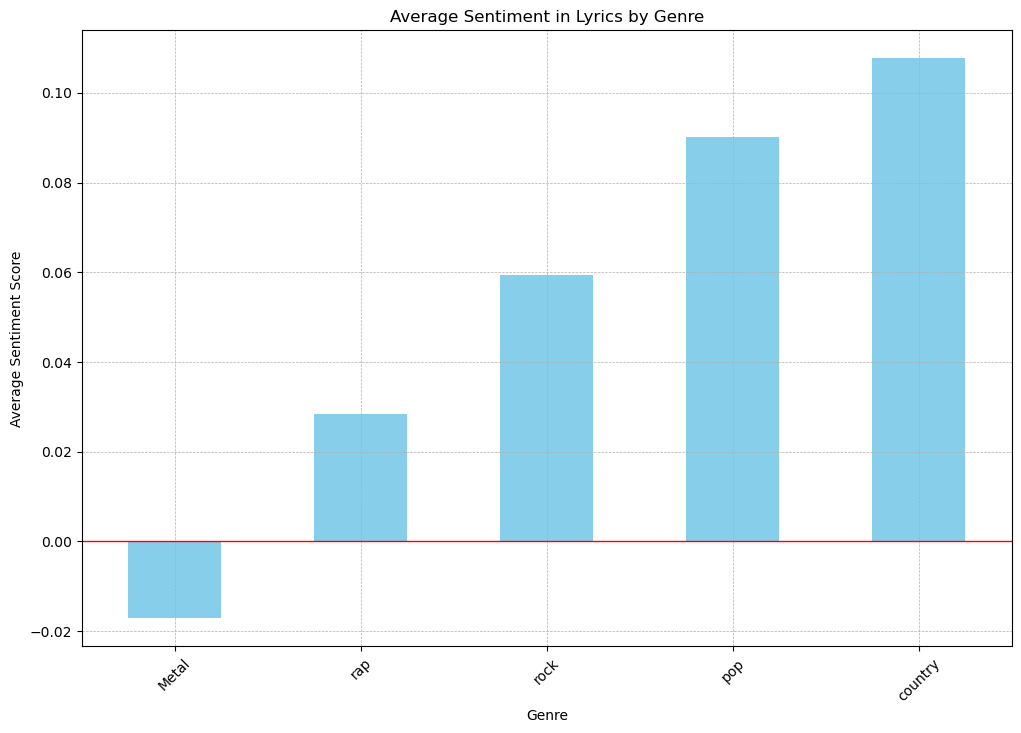

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Assuming df_lyrics is your DataFrame with 'Lyric' and 'genre' columns
# Calculate sentiment polarity for each lyric
df_lyrics['sentiment'] = df_lyrics['Lyric'].apply(lambda lyric: TextBlob(lyric).sentiment.polarity)

# Group by genre and calculate the average sentiment
average_sentiment_by_genre = df_lyrics.groupby('genre')['sentiment'].mean().sort_values()

plt.figure(figsize=(12, 8))
average_sentiment_by_genre.plot(kind='bar', color='skyblue')
plt.title('Average Sentiment in Lyrics by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(0, color='red', linewidth=1)  # Add a line at zero for neutral sentiment
plt.show()

